# Dikemodel continued - subspace partitioning

Scenario discovery.... (nog uitleg toevoegen)

## 1. Apply scenario discovery

**1.** Import model from Open Exploration

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

**2.** Import results from Open Exploration

bla bla importeren en levers weghalen



In [17]:
# HIER GING DUS WSS IETS FOUT !

# from ema_workbench import load_results
#
# # Laad de resultaten
# results = load_results('dike_open_exploration_results.tar.gz')
# #results = load_results('dike_open_exploration_results_pf2.tar.gz')
# experiments, outcomes = results
#
# columns_to_drop = [
#     '0_RfR 0', '0_RfR 1', '0_RfR 2',
#     '1_RfR 0', '1_RfR 1', '1_RfR 2',
#     '2_RfR 0', '2_RfR 1', '2_RfR 2',
#     '3_RfR 0', '3_RfR 1', '3_RfR 2',
#     '4_RfR 0', '4_RfR 1', '4_RfR 2',
#     'EWS_DaysToThreat',
#     'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
#     'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
#     'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
#     'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
#     'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
#     'scenario', 'policy', 'model'
# ]
#
# cleaned_experiments = experiments.drop(columns=columns_to_drop)

In [18]:
from ema_workbench import load_results

# Laad de resultaten
results = load_results('dike_open_exploration_results.tar.gz')
experiments, outcomes = results

# Kolommen die NIET relevant zijn voor scenario discovery m.b.t. RfR, en dus worden verwijderd
# columns_to_drop = [
#     'EWS_DaysToThreat',  # Early Warning System (voor deze analyse buiten scope)
#     # Dijkverhogingsmaatregelen per segment — voor nu buiten beschouwing
#     'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
#     'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
#     'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
#     'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
#     'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
#     # Metadata
#     'scenario', 'policy', 'model'
# ]

columns_to_drop = [
    # Metadata
    'scenario', 'policy', 'model'
]

# Maak een nieuw dataframe met alleen relevante onzekerheden en RfR-beleidsvariabelen
cleaned_experiments = experiments.drop(columns=columns_to_drop)


In [19]:
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
0,120,258.586586,10.0,0.153032,335.246128,1.5,0.512826,254.019441,1.5,0.457289,...,3,0,3,5,1,0,4,1,8,3
1,113,194.568728,10.0,0.293827,255.509874,10.0,0.068949,49.174779,1.5,0.544252,...,3,0,3,5,1,0,4,1,8,3
2,61,91.891624,10.0,0.693707,119.755578,1.5,0.738327,268.405931,1.0,0.673490,...,3,0,3,5,1,0,4,1,8,3
3,37,202.480358,1.0,0.190247,291.386916,1.0,0.796584,310.859423,1.0,0.472770,...,3,0,3,5,1,0,4,1,8,3
4,72,107.315104,1.5,0.891560,161.090764,1.0,0.663633,282.442271,10.0,0.736509,...,3,0,3,5,1,0,4,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274995,11,36.472636,10.0,0.861548,311.634628,1.0,0.406204,94.075970,1.0,0.267837,...,2,10,6,4,7,9,8,5,6,3
274996,83,114.609975,1.0,0.701080,236.826590,1.5,0.384472,229.176558,1.5,0.279916,...,2,10,6,4,7,9,8,5,6,3
274997,117,209.328350,1.0,0.152388,30.133378,1.5,0.511698,117.241683,1.5,0.292723,...,2,10,6,4,7,9,8,5,6,3
274998,120,55.912132,10.0,0.471526,219.754121,1.5,0.190638,307.120528,1.5,0.020785,...,2,10,6,4,7,9,8,5,6,3


(array([12000., 17000., 35000., 37000., 64000., 48000., 35000., 18000.,
         5000.,  4000.]),
 array([3.88400e+08, 5.39030e+08, 6.89660e+08, 8.40290e+08, 9.90920e+08,
        1.14155e+09, 1.29218e+09, 1.44281e+09, 1.59344e+09, 1.74407e+09,
        1.89470e+09]),
 <BarContainer object of 10 artists>)

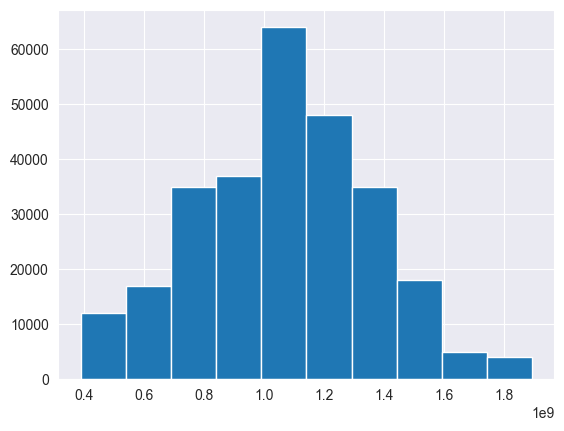

In [20]:
y_rfr = outcomes['RfR Total Costs']
plt.hist(y_rfr)


**3.** Apply scenario discovery


### 1. RFR Total Cost

'RfR Total Costs': 135000 van 275000 scenario's voldoen aan de drempel.


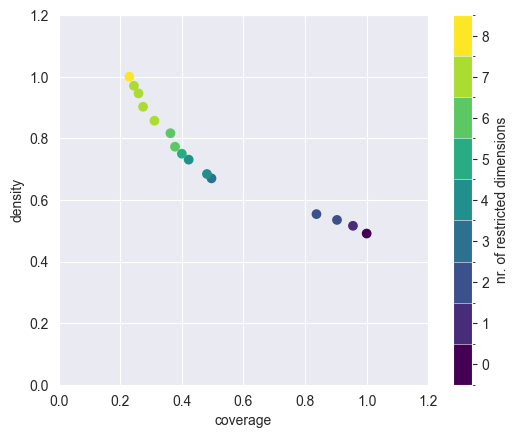

In [24]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

# Binaire classificatie aanmaken
threshold_rfr_min = 1000000000
threshold_rfr_max = 1400000000

y_rfr = (outcomes['RfR Total Costs'] >= threshold_rfr_min) & (outcomes['RfR Total Costs'] <= threshold_rfr_max)

# Controleer of er voldoende positieve gevallen zijn
if y_rfr.sum() < 10:
    raise ValueError(f"Te weinig positieve classificaties ({y_rfr.sum()}) onder de drempel van {threshold_rfr} voor 'RfR Total Costs'.")

# PRIM uitvoeren
x_rfr = cleaned_experiments.copy()
prim_alg_rfr = prim.Prim(x_rfr, y_rfr, threshold=0.8)
box_rfr = prim_alg_rfr.find_box()

# Resultaten tonen
print(f"'RfR Total Costs': {y_rfr.sum()} van {len(y_rfr)} scenario's voldoen aan de drempel.")
box_rfr.show_tradeoff()
#box_rfr.show_box()
plt.show()

coverage        0.273585
density         1.000000
id              7.000000
k           29000.000000
mass            0.105455
mean            1.000000
n           29000.000000
res_dim         7.000000
Name: 7, dtype: float64

                   box 7                        
                     min   max qp value qp value
1_RfR 2              0.0   0.0      NaN      0.0
3_RfR 2              0.0   0.0      NaN      0.0
4_RfR 1              0.0   0.0      NaN      0.0
A.1_DikeIncrease 0   0.0   9.0      NaN      0.0
A.3_DikeIncrease 1   0.0   9.0      NaN      0.0
A.2_DikeIncrease 2   0.0   9.0      NaN      1.0
A.3_DikeIncrease 2   1.0  10.0      1.0      NaN



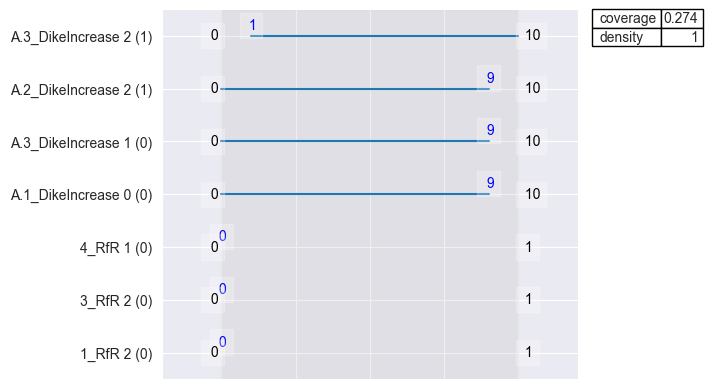

In [7]:
box_rfr.inspect()
box_rfr.inspect(style='graph')
plt.show()

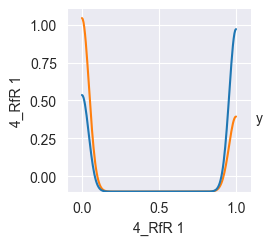

In [8]:
box_rfr.show_pairs_scatter(1)
plt.show()

In [9]:
print(len(box_rfr.box_lims[0].keys()))
print(list(box_rfr.box_lims[0].keys()))

50
['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2', 'EWS_DaysToThreat']


In [10]:
# dims_rfr = ['0_RfR 0', '1_RfR 1', '2_RfR 2', 'A.1_pfail']  # voorbeeldmix
# box_rfr.show_pairs_scatter(dims=dims_rfr)
# plt.title("PRIM scatter - RfR Total Costs (select dims)")
# plt.show()

### 2. Expected Annual Damage

'Expected Annual Damage': 176086 van 275000 scenario's voldoen aan de drempel.


/Users/evalievanoijen/PycharmProjects/group25_mbdm/venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/evalievanoijen/PycharmProjects/group25_mbdm/venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/evalievanoijen/PycharmProjects/group25_mbdm/venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas

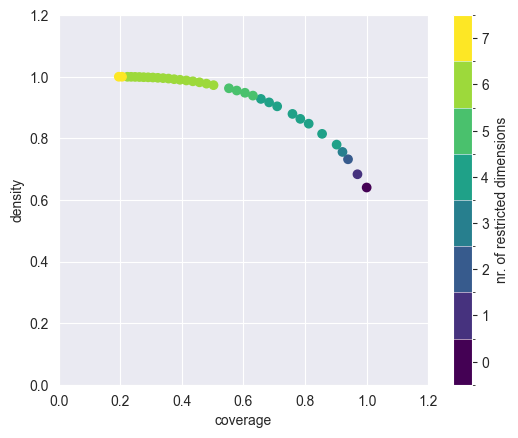

In [11]:
# Binaire classificatie aanmaken
threshold_ead = 5000000
y_ead = outcomes['Expected Annual Damage'] <= threshold_ead

# Controle op voldoende positieve gevallen
if y_ead.sum() < 10:
    raise ValueError(f"Te weinig positieve classificaties ({y_ead.sum()}) onder de drempel van {threshold_ead} voor 'Expected Annual Damage'.")

# PRIM uitvoeren
x_ead = cleaned_experiments.copy()
prim_alg_ead = prim.Prim(x_ead, y_ead, threshold=0.8)
box_ead = prim_alg_ead.find_box()

# Resultaten tonen
print(f"'Expected Annual Damage': {y_ead.sum()} van {len(y_ead)} scenario's voldoen aan de drempel.")
box_ead.show_tradeoff()
#box_ead.show_box()
plt.show()


coverage        0.195382
density         1.000000
id             34.000000
k           34404.000000
mass            0.125105
mean            1.000000
n           34404.000000
res_dim         7.000000
Name: 34, dtype: float64

                      box 34                                   
                         min        max       qp value qp value
A.2_pfail           0.396902   0.999127   0.000000e+00      NaN
A.3_pfail           0.521986   0.999588   0.000000e+00      NaN
A.2_DikeIncrease 0  3.000000  10.000000   0.000000e+00      NaN
A.3_DikeIncrease 0  2.000000  10.000000   0.000000e+00      NaN
A.1_pfail           0.211552   0.999545  3.109419e-141      NaN
A.1_DikeIncrease 0  1.000000  10.000000   1.791338e-92      NaN
A.2_DikeIncrease 1  1.000000  10.000000   2.506026e-02      NaN



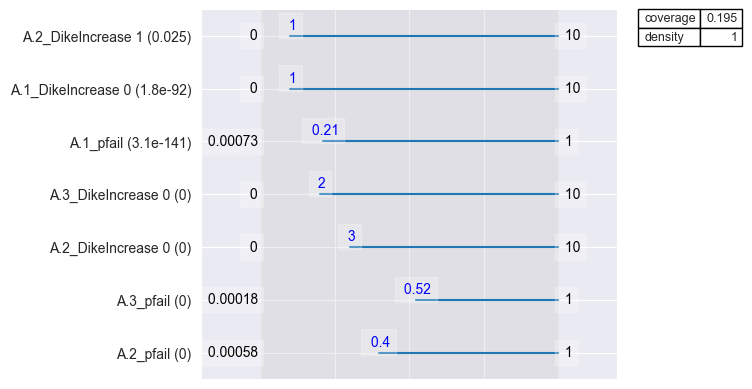

In [12]:
box_ead.inspect()
box_ead.inspect(style='graph')
plt.show()

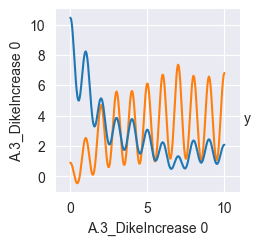

In [13]:
box_ead.show_pairs_scatter(1)
plt.show()

In [14]:
print(len(box_ead.box_lims[0].keys()))
print(list(box_ead.box_lims[0].keys()))

50
['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2', 'EWS_DaysToThreat']


In [15]:
# # Selecteer handmatig een subset (bijv. 2 onzekerheden en 2 beleidshefbomen)
# dims = ['A.1_pfail', 'A.2_pfail', '1_RfR 0', '2_RfR 1']
#
# box_ead.show_pairs_scatter(dims=dims)
# plt.title("PRIM scatter - Expected Annual Damage (select dims)")
# plt.show()

In [16]:
# dims = list(box_ead.box_lims[0].keys())
# box_ead.show_pairs_scatter(dims=dims)
# plt.title("PRIM scatter - Expected Annual Damage (restricted dims)")
# plt.show()

### 3. 'Dike Investment Costs'

'Dike Investment Costs': 222000 van 275000 scenario's voldoen aan de drempel van 600000000.


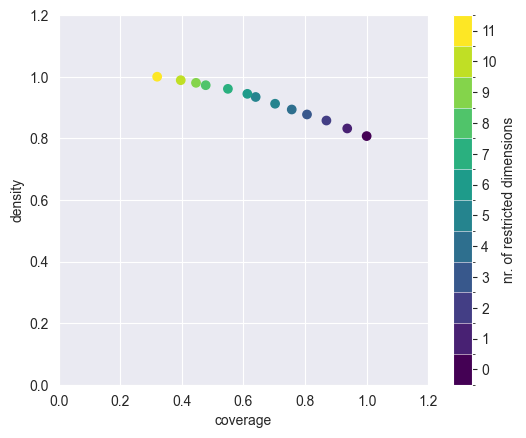

In [17]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt

# Selecteer de relevante outcome-data
data_dike_inv = outcomes['Dike Investment Costs']

# Stel een binaire classificatie op voor lage investeringskosten
threshold_dike_inv = 600_000_000
y_dike_inv = (data_dike_inv <= threshold_dike_inv).astype(bool)

# Controleer of er voldoende positieve gevallen zijn
if y_dike_inv.sum() < 10:
    raise ValueError(f"Te weinig positieve classificaties ({y_dike_inv.sum()}) onder de drempel van {threshold_dike_inv} voor 'Dike Investment Costs'.")

# PRIM uitvoeren
x_dike_inv = cleaned_experiments.copy()
prim_alg_dike_inv = prim.Prim(x_dike_inv, y_dike_inv, threshold=0.8)
box_dike_inv = prim_alg_dike_inv.find_box()

# Resultaten tonen
print(f"'Dike Investment Costs': {y_dike_inv.sum()} van {len(y_dike_inv)} scenario's voldoen aan de drempel van {threshold_dike_inv}.")
box_dike_inv.show_tradeoff()
#box_dike_inv.show_box()
plt.show()


coverage        0.319820
density         1.000000
id             12.000000
k           71000.000000
mass            0.258182
mean            1.000000
n           71000.000000
res_dim        11.000000
Name: 12, dtype: float64

                   box 12                        
                      min   max qp value qp value
A.1_DikeIncrease 1    0.0   8.0      NaN      0.0
A.1_DikeIncrease 2    0.0   9.0      NaN      0.0
A.2_DikeIncrease 0    0.0   9.0      NaN      0.0
A.2_DikeIncrease 1    0.0   9.0      NaN      0.0
A.2_DikeIncrease 2    0.0   9.0      NaN      0.0
A.3_DikeIncrease 0    0.0   9.0      NaN      0.0
A.3_DikeIncrease 1    0.0   9.0      NaN      0.0
A.3_DikeIncrease 2    0.0   9.0      NaN      0.0
A.5_DikeIncrease 1    1.0  10.0      0.0      NaN
A.5_DikeIncrease 2    1.0  10.0      0.0      NaN
EWS_DaysToThreat      1.0   4.0      0.0      NaN



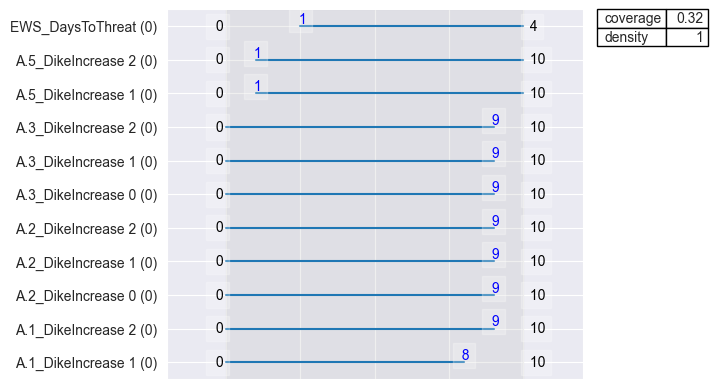

In [18]:
box_dike_inv.inspect()
box_dike_inv.inspect(style='graph')
plt.show()

In [19]:
# dims = list(box_dike_inv.box_lims[0].keys())
# box_dike_inv.show_pairs_scatter(dims=dims)
# plt.title("")
# plt.show()

In [20]:
print(len(box_dike_inv.box_lims[0].keys()))
print(list(box_dike_inv.box_lims[0].keys()))

50
['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2', 'EWS_DaysToThreat']


In [21]:
# dims_dike = ['A.2_Bmax', 'A.3_Brate', 'A.3_pfail', 'discount rate 1']
# box_dike_inv.show_pairs_scatter(dims=dims_dike)
# plt.title("PRIM scatter - Dike Investment Costs (select dims)")
# plt.show()

# 2. Visualize the results using Dimensional Stacking


In [22]:
from ema_workbench.analysis import dimensional_stacking
import matplotlib.pyplot as plt

### 1. Dimensional stacking voor 'RfR Total Costs

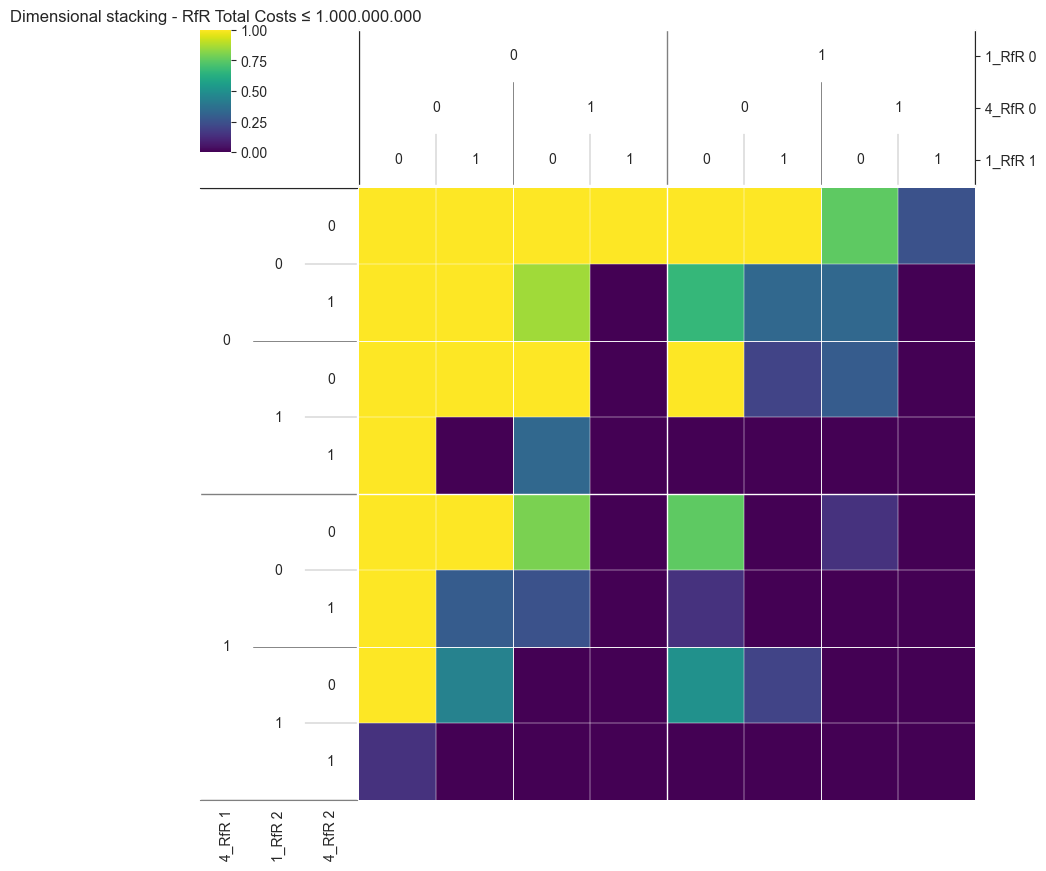

In [23]:
dimensional_stacking.create_pivot_plot(experiments, y_rfr)
plt.title("Dimensional stacking - RfR Total Costs ≤ 1.000.000.000")
plt.show()

### 2. Dimensional stacking voor 'Expected Annual Damage'


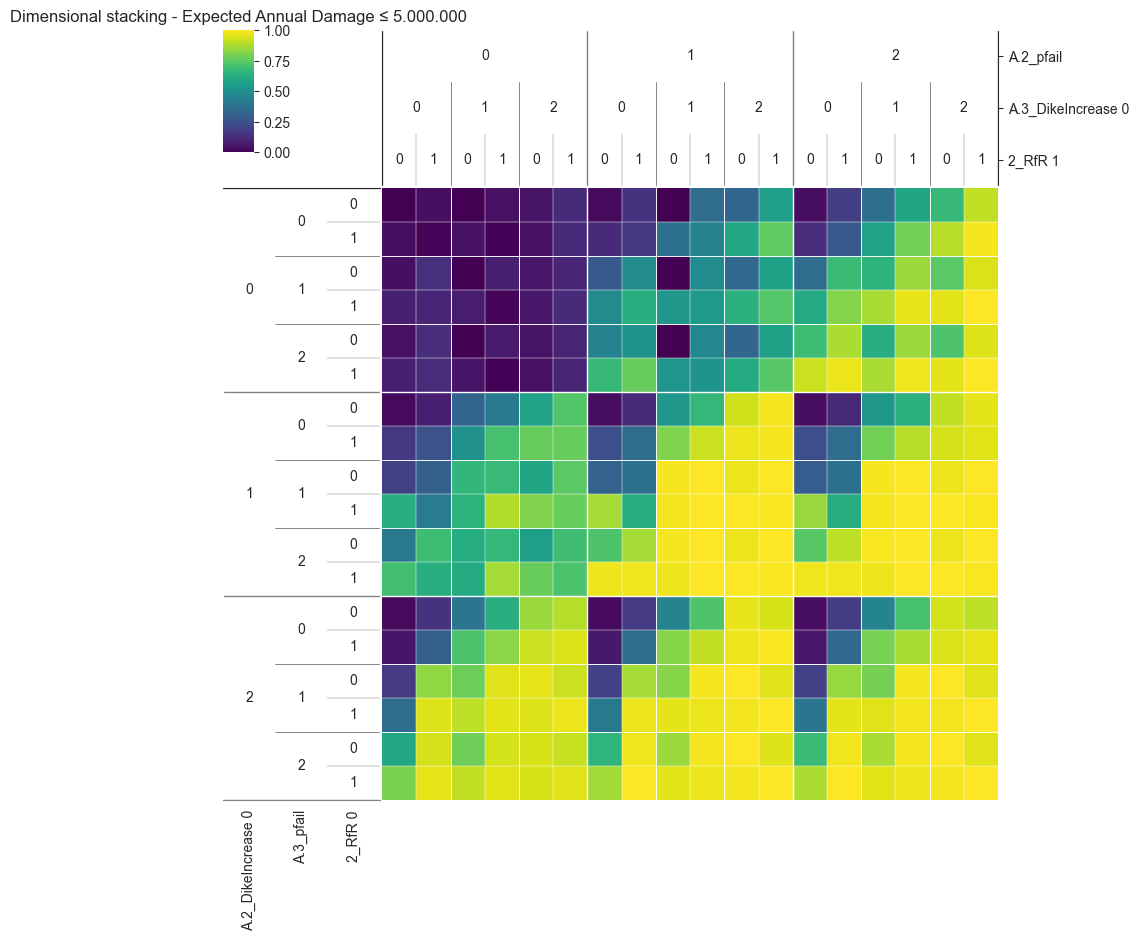

In [24]:
dimensional_stacking.create_pivot_plot(experiments, y_ead)
plt.title("Dimensional stacking - Expected Annual Damage ≤ 5.000.000")
plt.show()

### 3. Dimensional stacking voor 'Dike Investment Costs'

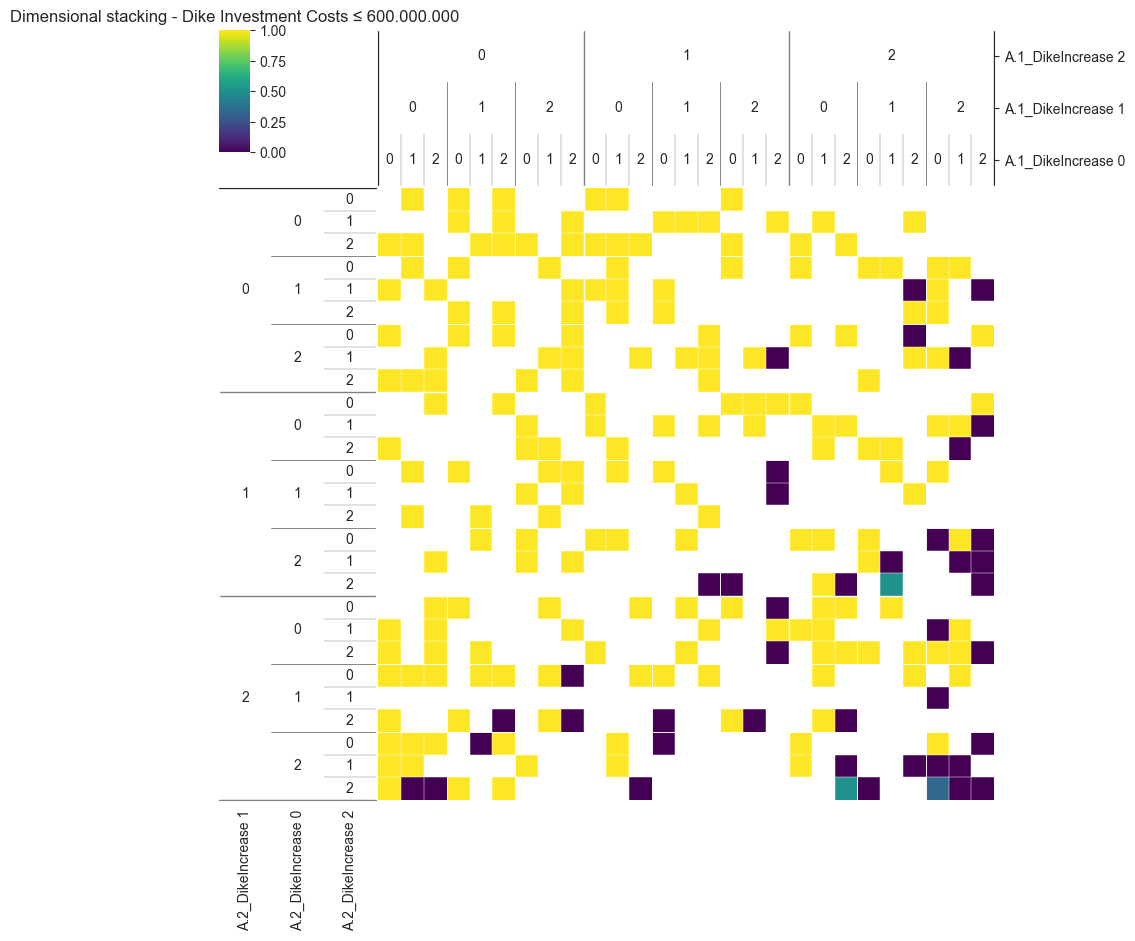

In [25]:
dimensional_stacking.create_pivot_plot(experiments, y_dike_inv)
plt.title("Dimensional stacking - Dike Investment Costs ≤ 600.000.000")
plt.show()